# Imports

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats.mstats import gmean

# CPM

In [43]:
cpm = pd.read_csv("cpm_normalized.csv")
cpm = cpm.T
cpm.columns = cpm.iloc[0, :]
cpm.drop("Unnamed: 0", inplace=True)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(cpm)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
sample = ['lv', 'bv', 'bp', 'bp', 'bl', 'bl', 'bv', 'lv', 'lp', 'lp', 'll', 'll']
principal_df['Sample'] = sample

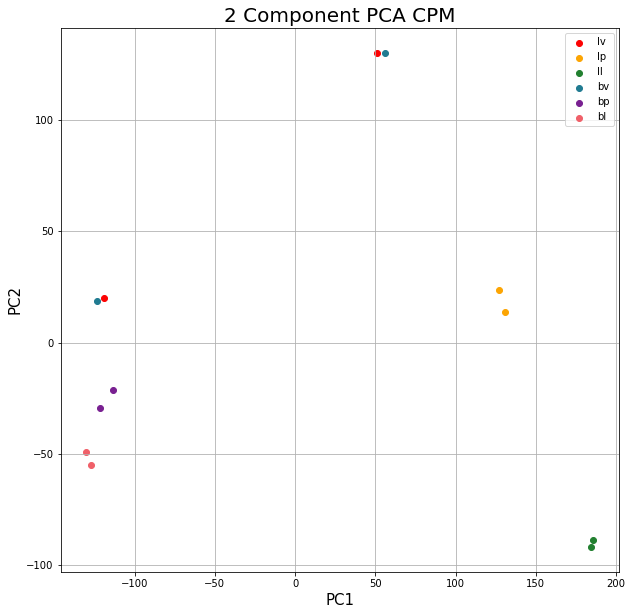

In [23]:

fig, ax = plt.subplots(figsize=(10, 10))
colors = ["#fc0303", "#fca503", "#228030", "#207b91", "#792091", "#f06069"]
cell_stats = ['lv', 'lp', 'll', 'bv', 'bp', 'bl']
for cell_stat, color in zip(cell_stats, colors):
    idx = principal_df.loc[:, "Sample"] == cell_stat 
    ax.scatter(principal_df[idx]['PC1'], principal_df[idx]['PC2'], c=color )
ax.legend(cell_stats)
ax.grid(True)
ax.set_xlabel("PC1", fontsize=15)
ax.set_ylabel("PC2", fontsize=15)
ax.set_title("2 Component PCA CPM", fontsize=20)
plt.savefig("CPM_PCA")

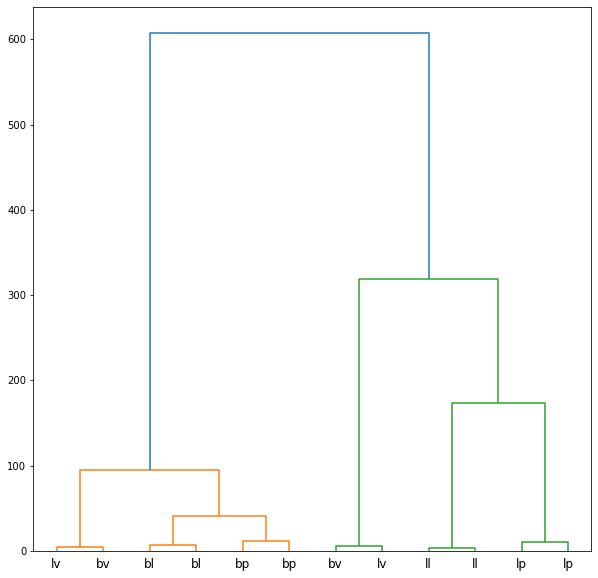

In [25]:
linked = linkage(principal_df.loc[:, ['PC1', 'PC2']], 'ward')
plt.figure(figsize=(10, 10))
dendrogram(linked, labels=sample, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.savefig("CPM_HC")
plt.show()


# TPM

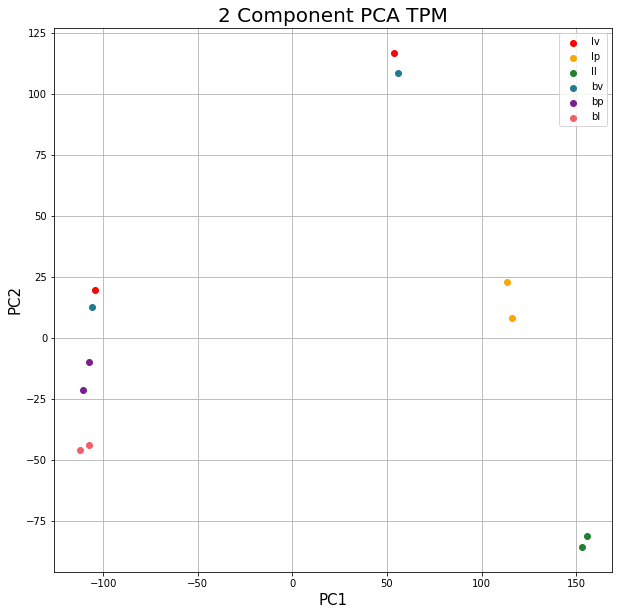

In [26]:
tpm = pd.read_csv("tpm_normalized.csv")
tpm = tpm.T
pca = PCA(n_components=2)
principal_components = pca.fit_transform(tpm)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
sample = ['lv', 'bv', 'bp', 'bp', 'bl', 'bl', 'bv', 'lv', 'lp', 'lp', 'll', 'll']
principal_df['Sample'] = sample

fig, ax = plt.subplots(figsize=(10, 10))
colors = ["#fc0303", "#fca503", "#228030", "#207b91", "#792091", "#f06069"]
cell_stats = ['lv', 'lp', 'll', 'bv', 'bp', 'bl']
for cell_stat, color in zip(cell_stats, colors):
    idx = principal_df.loc[:, "Sample"] == cell_stat 
    ax.scatter(principal_df[idx]['PC1'], principal_df[idx]['PC2'], c=color )
ax.legend(cell_stats)
ax.grid(True)
ax.set_xlabel("PC1", fontsize=15)
ax.set_ylabel("PC2", fontsize=15)
ax.set_title("2 Component PCA TPM", fontsize=20)
plt.savefig("TPM_PCA")

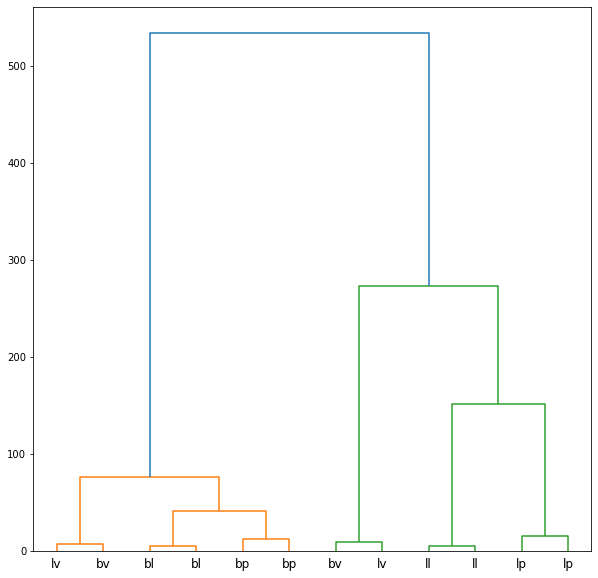

In [27]:
linked = linkage(principal_df.loc[:, ['PC1', 'PC2']], 'ward')
plt.figure(figsize=(10, 10))
dendrogram(linked, labels=sample, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.savefig("TPM_HC")
plt.show()

# DESeq2

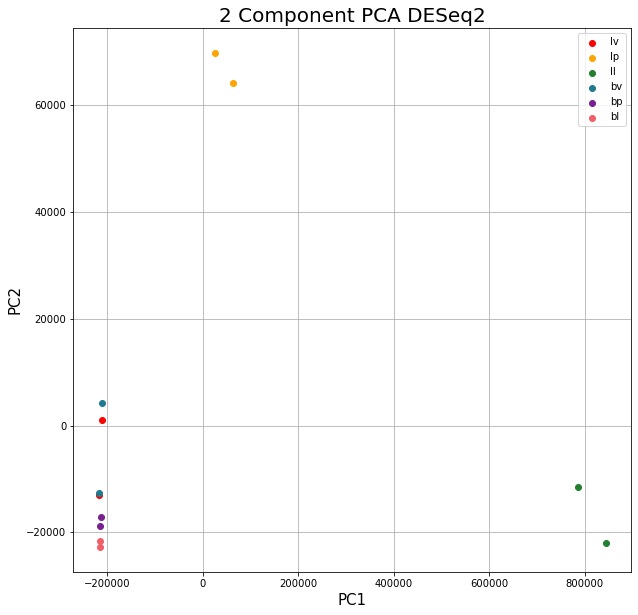

In [46]:
count_data = pd.read_csv("GSE60450_Lactation-GenewiseCounts.txt", sep="\t")
sample_count = count_data.iloc[:, 2:].copy()
sample_count += 0.25
pseudo_ref = (gmean(sample_count, axis=1)**(1/12)).reshape(-1, 1)
sample_count/=pseudo_ref
normalization_factors = sample_count.median()
count_data.iloc[:, 2:]/=normalization_factors
deseq2 = count_data
deseq2 = deseq2.T
pca = PCA(n_components=2)
principal_components = pca.fit_transform(deseq2.iloc[2:, :])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
sample = ['lv', 'bv', 'bp', 'bp', 'bl', 'bl', 'bv', 'lv', 'lp', 'lp', 'll', 'll']
principal_df['Sample'] = sample

fig, ax = plt.subplots(figsize=(10, 10))
colors = ["#fc0303", "#fca503", "#228030", "#207b91", "#792091", "#f06069"]
cell_stats = ['lv', 'lp', 'll', 'bv', 'bp', 'bl']
for cell_stat, color in zip(cell_stats, colors):
    idx = principal_df.loc[:, "Sample"] == cell_stat 
    ax.scatter(principal_df[idx]['PC1'], principal_df[idx]['PC2'], c=color )
ax.legend(cell_stats)
ax.grid(True)
ax.set_xlabel("PC1", fontsize=15)
ax.set_ylabel("PC2", fontsize=15)
ax.set_title("2 Component PCA DESeq2", fontsize=20)
plt.savefig("DESeq2_PCA")

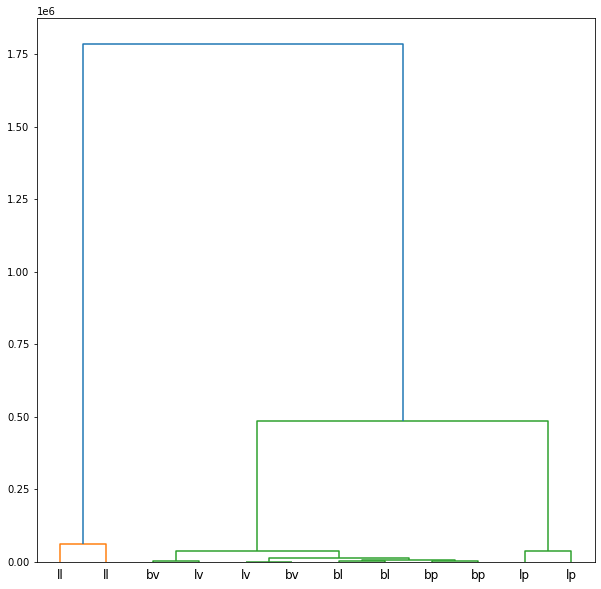

In [47]:
linked = linkage(principal_df.loc[:, ['PC1', 'PC2']], 'ward')
plt.figure(figsize=(10, 10))
dendrogram(linked, labels=sample, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.savefig("DESeq2_HC")
plt.show()

In [41]:
deseq2

,0,1,2,3,4,5,6,7,8,9,...,27169,27170,27171,27172,27173,27174,27175,27176,27177,27178
EntrezGeneID,497097.000000,1.005039e+08,100038431.0,19888.000000,20671.000000,27395.000000,18777.000000,1.005037e+08,21399.000000,58175.000000,...,100041631.0,100504702.0,100040357.0,100861808.0,100504460.0,1.008618e+08,1.008619e+08,170942.000000,100861691.0,100504472.0
Length,3634.000000,3.259000e+03,1634.0,9747.000000,3130.000000,4203.000000,2433.000000,7.990000e+02,2847.000000,2241.000000,...,995.0,3540.0,672.0,513.0,3540.0,2.794000e+03,2.500000e+02,777.000000,745.0,3540.0
MCL1-DG_BC2CTUACXX_ACTTGA_L002_R1,23.209916,5.299068e-02,0.0,0.052991,5.617012,16.374119,34.549921,0.000000e+00,84.997045,0.211963,...,0.0,0.0,0.0,0.0,0.0,2.702525e+00,2.808506e+00,26.760292,0.0,0.0
MCL1-DH_BC2CTUACXX_CAGATC_L002_R1,16.338412,0.000000e+00,0.0,0.054461,9.911970,12.743961,28.047607,5.446137e-02,81.419753,0.108923,...,0.0,0.0,0.0,0.0,0.0,3.594451e+00,5.010446e+00,25.542384,0.0,0.0
MCL1-DI_BC2CTUACXX_ACAGTG_L002_R1,3.709721,5.707263e-02,0.0,0.000000,4.679955,19.233475,54.104850,0.000000e+00,98.221991,0.799017,...,0.0,0.0,0.0,0.0,0.0,5.307754e+00,6.905788e+00,37.211353,0.0,0.0
MCL1-DJ_BC2CTUACXX_CGATGT_L002_R1,14.252266,6.013614e-02,0.0,0.000000,6.314295,18.040842,56.227292,0.000000e+00,79.199298,0.240545,...,0.0,0.0,0.0,0.0,0.0,4.690619e+00,3.908849e+00,34.217465,0.0,0.0
MCL1-DK_BC2CTUACXX_TTAGGC_L002_R1,27.174355,0.000000e+00,0.0,0.000000,3.300840,22.261478,71.236728,0.000000e+00,88.969146,0.153527,...,0.0,0.0,0.0,0.0,0.0,6.678443e+00,2.763494e+00,20.342385,0.0,0.0
MCL1-DL_BC2CTUACXX_ATCACG_L002_R1,22.327289,3.111817e-01,0.0,0.000000,6.379225,21.004767,61.536187,0.000000e+00,82.929931,0.155591,...,0.0,0.0,0.0,0.0,0.0,4.978908e+00,3.345204e+00,12.369474,0.0,0.0
MCL1-LA_BC2CTUACXX_GATCAG_L001_R1,0.000000,0.000000e+00,0.0,0.765435,1.224696,42.864364,63.224936,0.000000e+00,102.109038,13.012396,...,0.0,0.0,0.0,0.0,0.0,1.086918e+01,8.879047e+00,47.839692,0.0,0.0
MCL1-LB_BC2CTUACXX_TGACCA_L001_R1,0.000000,0.000000e+00,0.0,0.192024,1.600203,29.699774,55.175012,6.400813e-02,80.522233,10.561342,...,0.0,0.0,0.0,0.0,0.0,8.321057e+00,6.784862e+00,45.509784,0.0,0.0
